In [2]:
from typing import Dict

from tempfile import gettempdir
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch


import l5kit
from l5kit.configs import load_config_data
from l5kit.data import LocalDataManager, ChunkedDataset
from l5kit.dataset import AgentDataset, EgoDataset
from l5kit.rasterization import build_rasterizer
from l5kit.evaluation import write_pred_csv, compute_metrics_csv, read_gt_csv, create_chopped_dataset
from l5kit.evaluation.chop_dataset import MIN_FUTURE_STEPS
from l5kit.evaluation.metrics import neg_multi_log_likelihood, time_displace
from l5kit.geometry import transform_points
from l5kit.visualization import PREDICTED_POINTS_COLOR, TARGET_POINTS_COLOR, draw_trajectory
from prettytable import PrettyTable
from pathlib import Path

import matplotlib.pyplot as plt

import os
import random
import time

import warnings
warnings.filterwarnings("ignore")

import pytorch_lightning as pl
from argparse import Namespace
import numpy as np
from omegaconf import DictConfig
import torch.nn as nn
import torch
from torch.utils.data import DataLoader
from data.collect_data import TrajectoryDataset, seq_collate
from models.model_main import get_model
from models.pytorch_script import TrajectoryPredictor


from l5kit.data import LocalDataManager, ChunkedDataset
from l5kit.dataset import AgentDataset, EgoDataset
from l5kit.rasterization import build_rasterizer

from pytorch_lightning import Trainer, seed_everything
import os
from pytorch_lightning.loggers import TensorBoardLogger

from pytorch_lightning.callbacks import ModelCheckpoint
import logging
import torch

## Target vs Predicted

In [36]:
model = TrajPredictor.load_from_checkpoint("../saved_weights/trained-checkpoint-goalgan/_ckpt_epoch_47.ckpt")

GoalGAN(
  (encoder): MotionEncoder(
    (spatial_embedding): Linear(in_features=2, out_features=8, bias=True)
    (encoder): LSTM(8, 16)
  )
  (goalmodule): GoalGlobal(
    (CNN): CNN(
      (encoder): Sequential(
        (ConvBlock_1): Conv_Blocks(
          (Block): Sequential(
            (Conv_1): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (BN_1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (NonLin_1): ReLU()
            (Pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=(1, 1), ceil_mode=False)
            (Drop): Dropout2d(p=0.3, inplace=False)
          )
        )
        (ConvBlock_2): Conv_Blocks(
          (Block): Sequential(
            (Conv_1): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (BN_1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (NonLin_1): ReLU()
            (Pool): MaxPool2d(ker

In [20]:
test = TrajectoryDataset()

In [37]:
temp = seq_collate(test)
model.generator.gen()
ans = model(temp)

### Real vs Predicted Trajectories

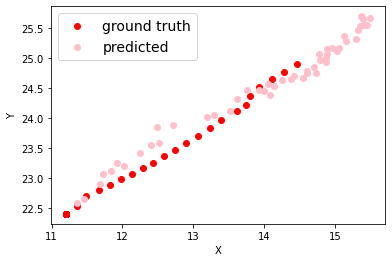

In [40]:
plot_index = 126
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(temp["gt_xy"].permute(1,0,2)[plot_index,:,0], temp["gt_xy"].permute(1,0,2)[plot_index,:,1],color="red",label="ground truth")
ax1.scatter(ans["out_xy"].permute(1,0,2)[plot_index,:,0].detach().numpy(), ans["out_xy"].permute(1,0,2)[plot_index,:,1].detach().numpy(),color="pink",label="predicted")   
plt.legend(loc='best',fontsize=14)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

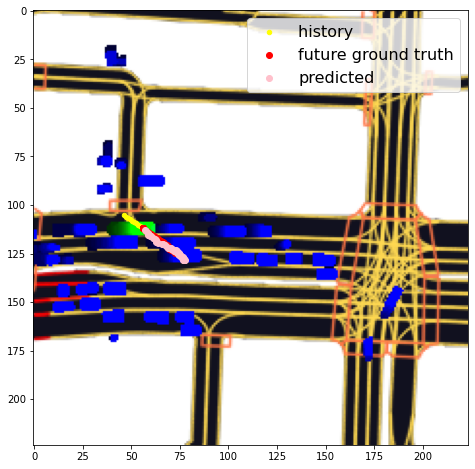

In [45]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
img_scaling = cfg['img_scaling']
ax1.scatter(temp["in_xy"].permute(1,0,2)[plot_index,:,0]/img_scaling, temp["in_xy"].permute(1,0,2)[plot_index,:,1]/img_scaling,color="yellow",label="history ",s=20)
ax1.scatter(temp["gt_xy"].permute(1,0,2)[plot_index,:,0]/img_scaling, temp["gt_xy"].permute(1,0,2)[plot_index,:,1]/img_scaling,color="red",label="future ground truth")
ax1.scatter(ans["out_xy"].permute(1,0,2)[plot_index,:,0].detach().numpy()/img_scaling, ans["out_xy"].permute(1,0,2)[plot_index,:,1].detach().numpy()/img_scaling,color="pink",label="predicted")   

plt.imshow(temp["scene_img"][plot_index]["local_image"])
plt.legend(loc='best',fontsize=16)
plt.show()
